### Input data
Csv file in the format
```
program, method, memory size, explored, optimum, time, design space size
```
that contains the results of runnig PAYNT for a set amount of time for each program and setup (using the basic Iterative approach, Injection approach, and Incremental restrictions approach).

In [232]:
import pandas as pd
import seaborn as sns

out = pd.read_csv("../workspace/log/output.csv", sep=",",
                  names=["program", "method", "memory_size", "explored",
                         "optimum", "time", "design_space_size"],
                  )
out["optimum"] = pd.to_numeric(out["optimum"], errors="coerce")
out = out.where(out["time"] > 0).dropna()
out = out.where(out["memory_size"] > 2).dropna()

for method in out["method"].unique():
    if (method not in ["Iterative", "Injection"]):
        out["method"] = out["method"].replace(method, "Incremental")


In [192]:
grouped = out.where((out["program"].str.contains("grid")) & (out["program"].str.contains("simple") == False)).dropna().groupby([
    "program", "method", "memory_size"
]).agg({"optimum": "max", "time": "sum"}) #.reset_index()

grouped = grouped.append(
    out.where(
        (out["program"].str.contains("grid")) & (out["program"].str.contains("simple")) |
        (out["program"].str.contains("maze"))
    ).dropna().groupby([
        "program", "method", "memory_size"
    ]).agg({"optimum": "min", "time": "sum"}) #.reset_index()
)
grouped = grouped.reset_index()
grouped.where(grouped["program"] == "workspace/examples/pomdp/grid/center/sketch.templ").dropna()

,program,method,memory_size,optimum,time
56,workspace/examples/pomdp/grid/center/sketch.templ,Incremental,2.0,0.487890,0.220231
57,workspace/examples/pomdp/grid/center/sketch.templ,Incremental,3.0,0.773992,1.558047
58,workspace/examples/pomdp/grid/center/sketch.templ,Incremental,4.0,0.846590,11.785756
59,workspace/examples/pomdp/grid/center/sketch.templ,Incremental,5.0,0.904572,85.206078
60,workspace/examples/pomdp/grid/center/sketch.templ,Incremental,6.0,0.920209,68.286182
61,workspace/examples/pomdp/grid/center/sketch.templ,Injection,2.0,0.487890,0.011260
62,workspace/examples/pomdp/grid/center/sketch.templ,Injection,3.0,0.773992,0.225640
63,workspace/examples/pomdp/grid/center/sketch.templ,Injection,4.0,0.846590,1.461900
64,workspace/examples/pomdp/grid/center/sketch.templ,Injection,5.0,0.846590,11.890727
65,workspace/examples/pomdp/grid/center/sketch.templ,Injection,6.0,0.846590,223.625077


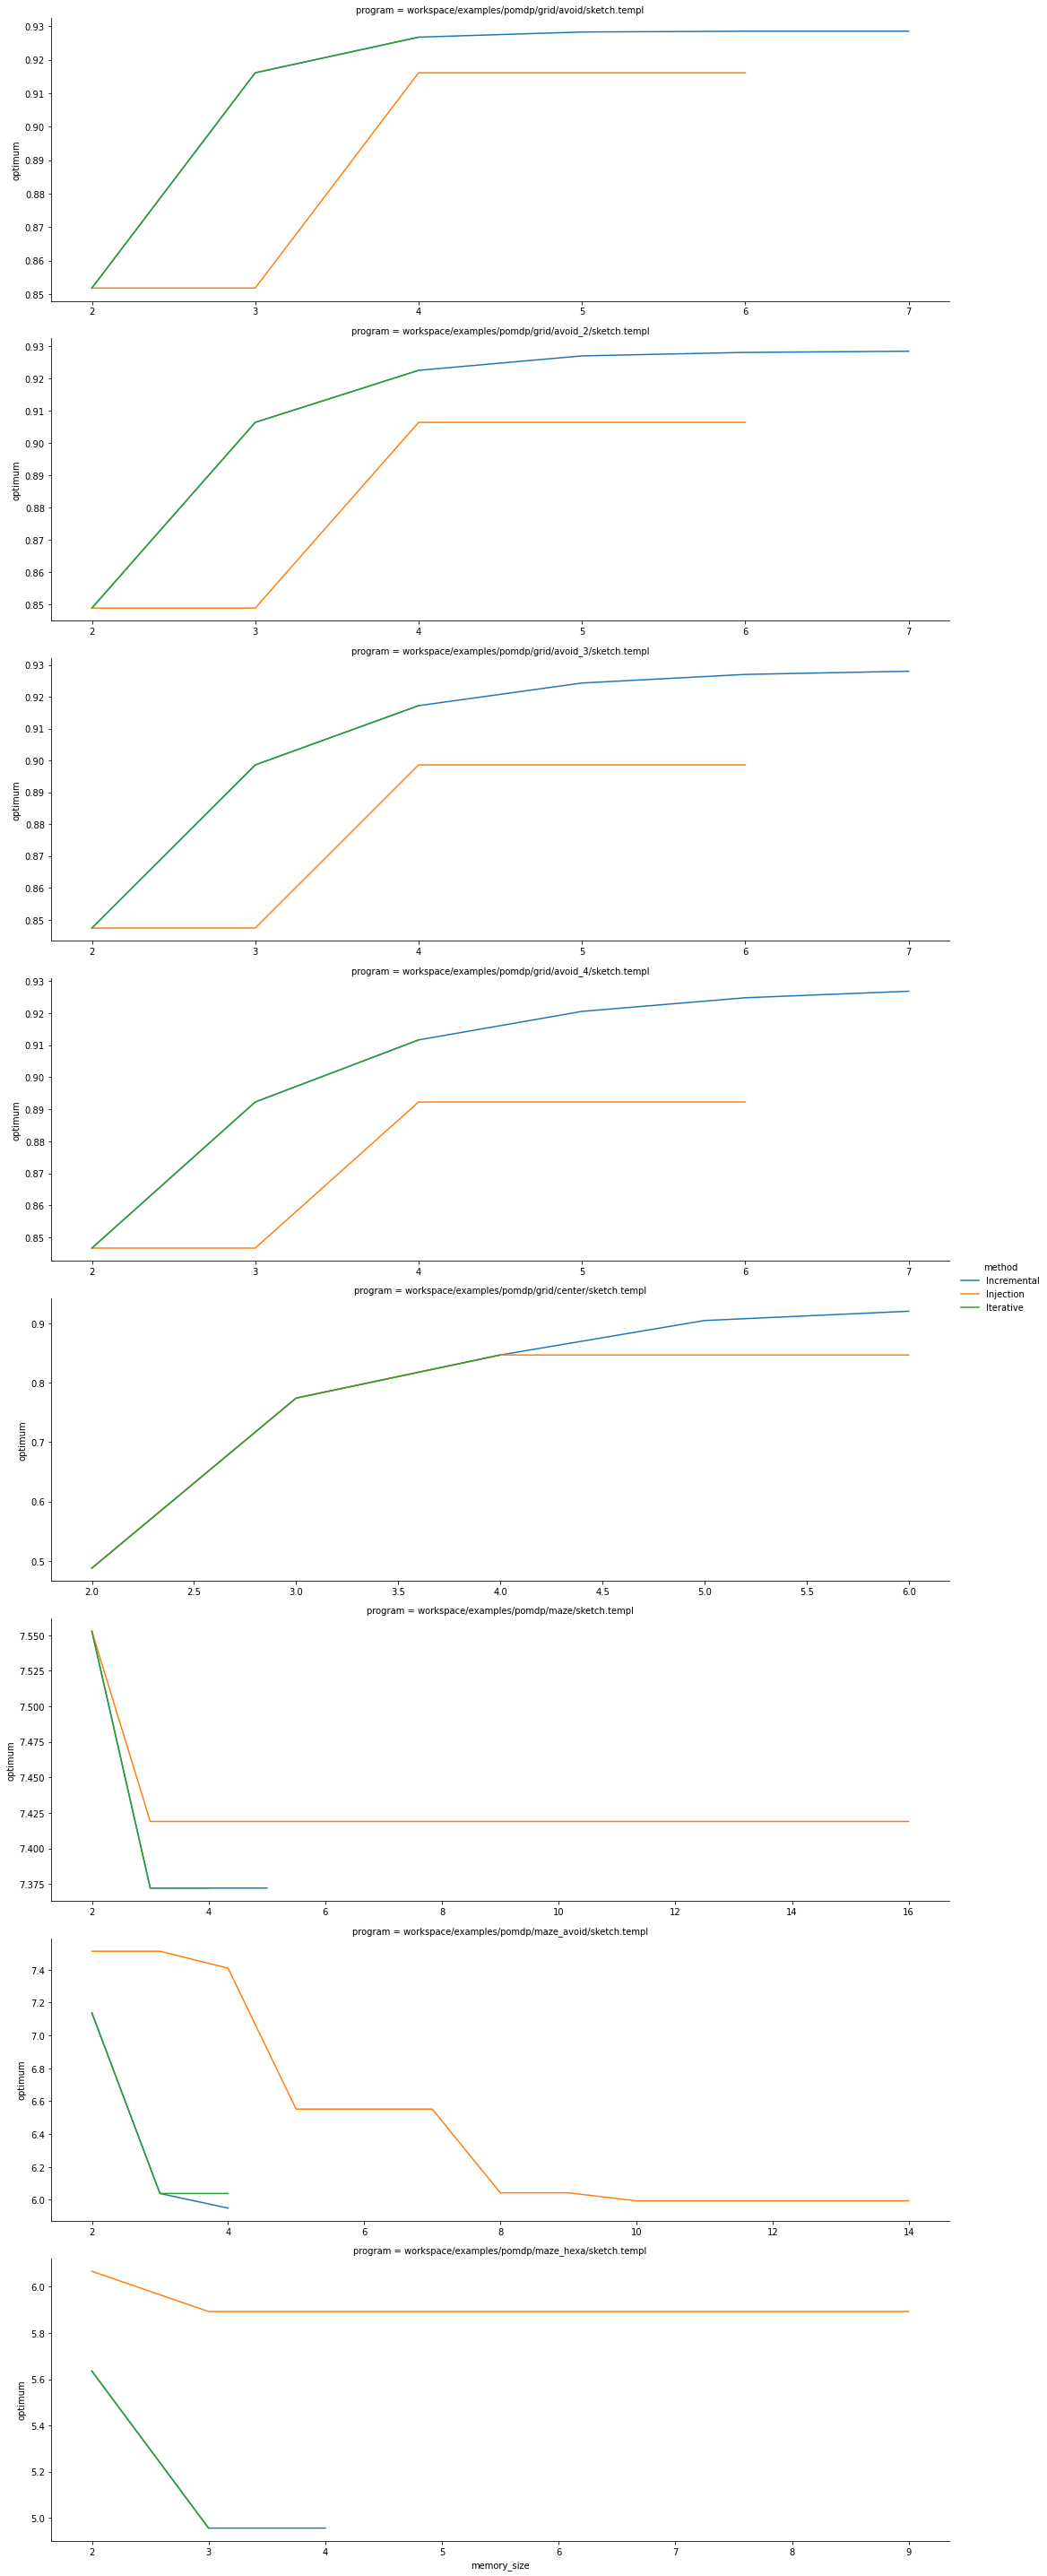

In [153]:
grid = sns.relplot(
                data=grouped, #.where(grouped["program"] == program).dropna(),
                x="memory_size",
                y="optimum",
                col="program",
                kind="line",
                hue="method",
                legend="full",
                aspect=3,
                col_wrap=1,
                facet_kws={'sharey': False, 'sharex': False}
            )
# grid.savefig("../workspace/log/" +
#              program[25:].replace("/", "_") + "_opt.png")


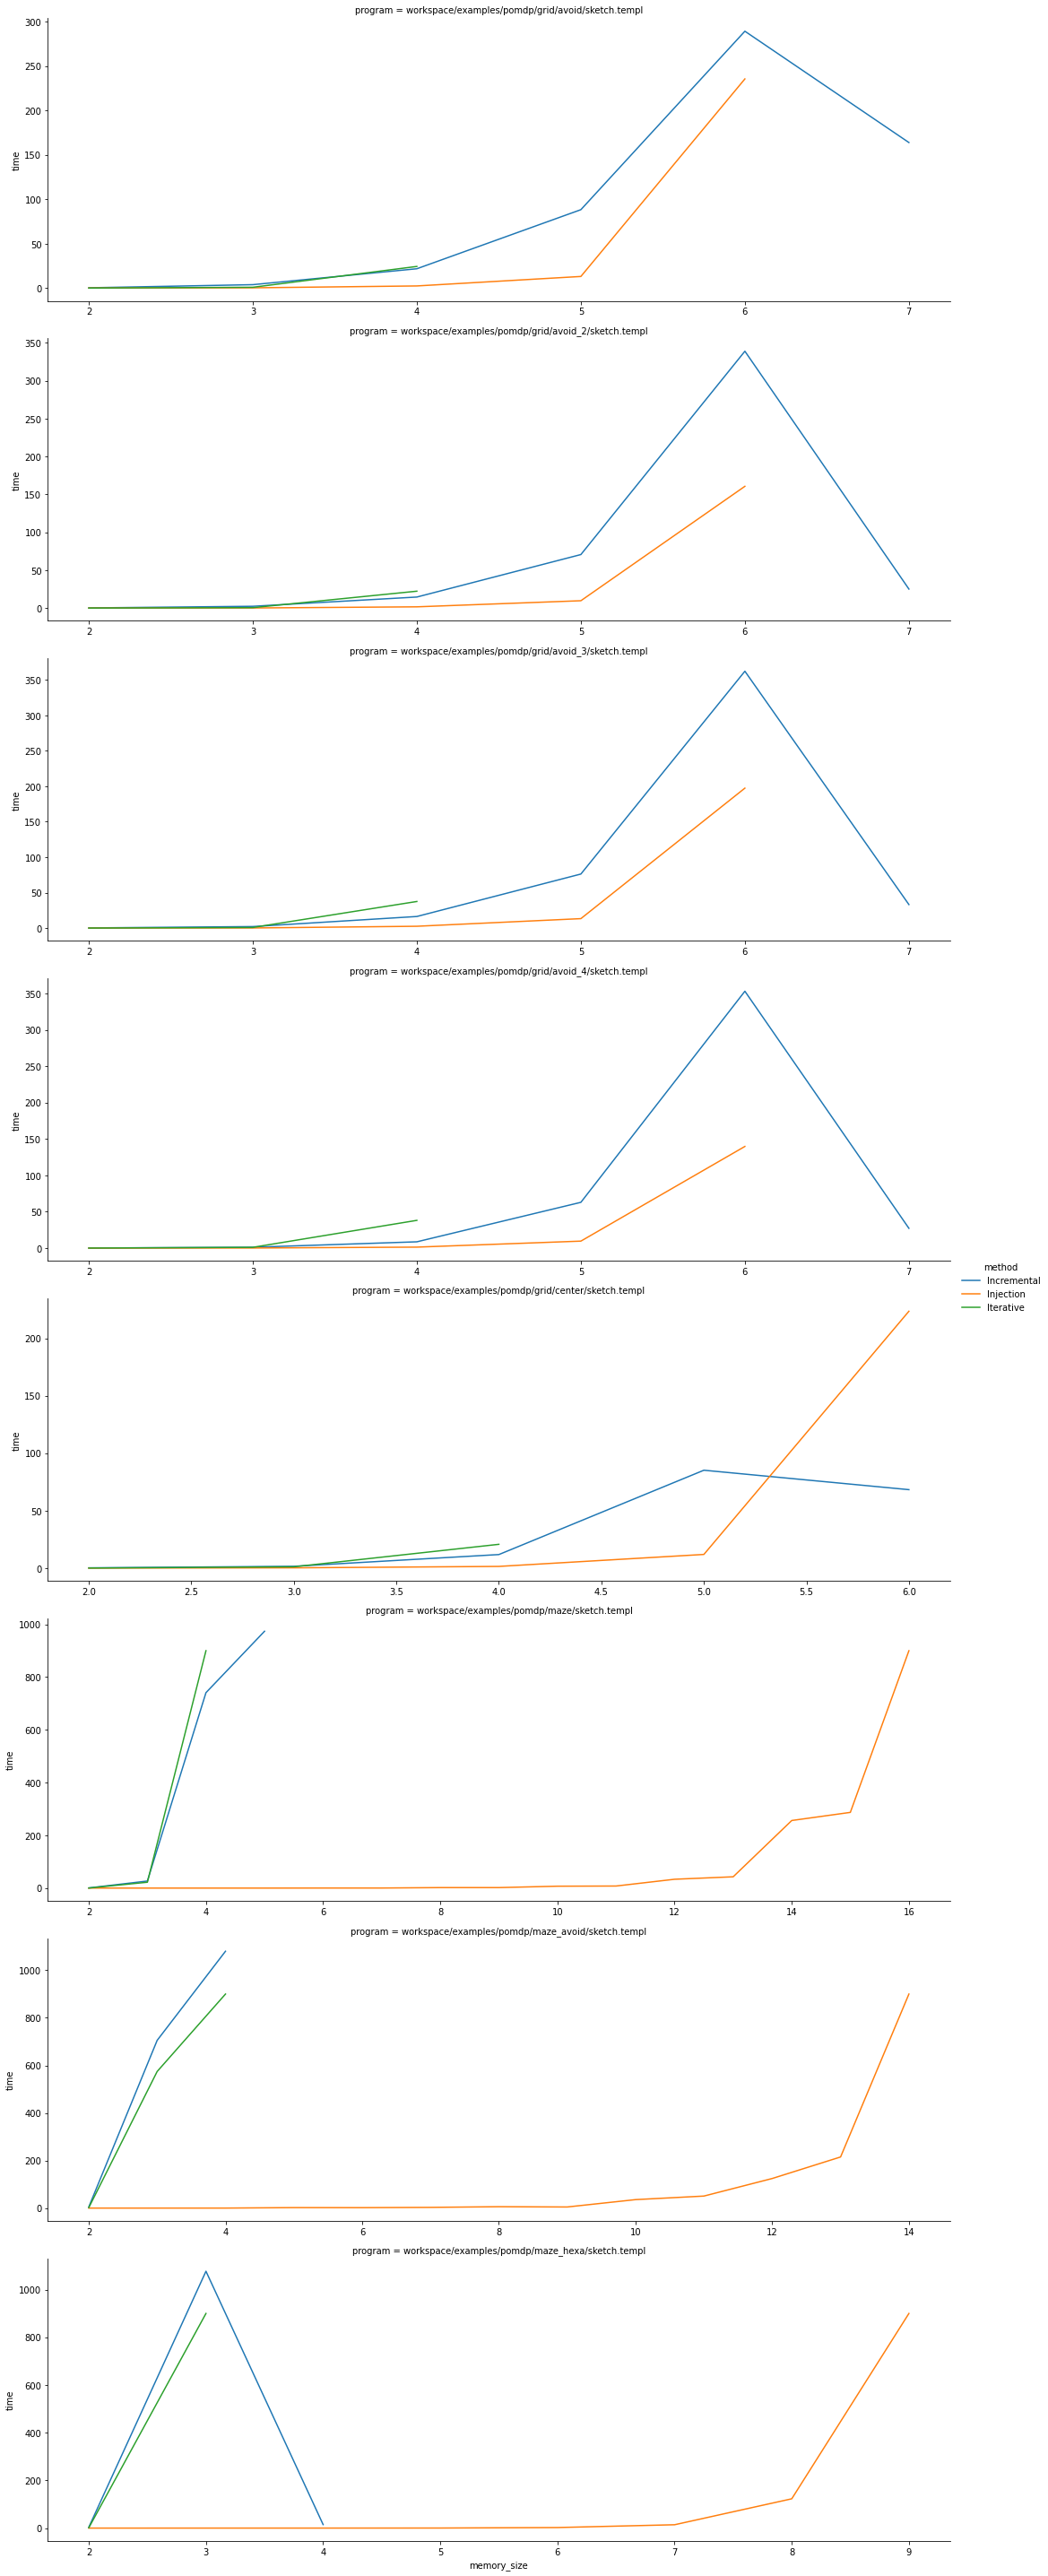

In [154]:
grid = sns.relplot(
                data=grouped, #.where(grouped["program"] == program).dropna(),
                x="memory_size",
                y="time",
                col="program",
                kind="line",
                hue="method",
                legend="full",
                aspect=3,
                col_wrap=1,
                facet_kws={'sharey': False, 'sharex': False}
            )


,program,method,optimum,time_sum
11,workspace/examples/pomdp/grid/avoid_2/sketch.t...,Incremental,0.848876,0.093488
12,workspace/examples/pomdp/grid/avoid_2/sketch.t...,Incremental,0.901521,0.441145
13,workspace/examples/pomdp/grid/avoid_2/sketch.t...,Incremental,0.906415,2.394712
14,workspace/examples/pomdp/grid/avoid_2/sketch.t...,Incremental,0.920939,1.572534
15,workspace/examples/pomdp/grid/avoid_2/sketch.t...,Incremental,0.922537,14.578579
16,workspace/examples/pomdp/grid/avoid_2/sketch.t...,Incremental,0.926601,6.828939
17,workspace/examples/pomdp/grid/avoid_2/sketch.t...,Incremental,0.927012,70.616758
18,workspace/examples/pomdp/grid/avoid_2/sketch.t...,Incremental,0.928088,338.859516
19,workspace/examples/pomdp/grid/avoid_2/sketch.t...,Incremental,0.928457,25.118138
20,workspace/examples/pomdp/grid/avoid_2/sketch.t...,Injection,0.848876,0.151851


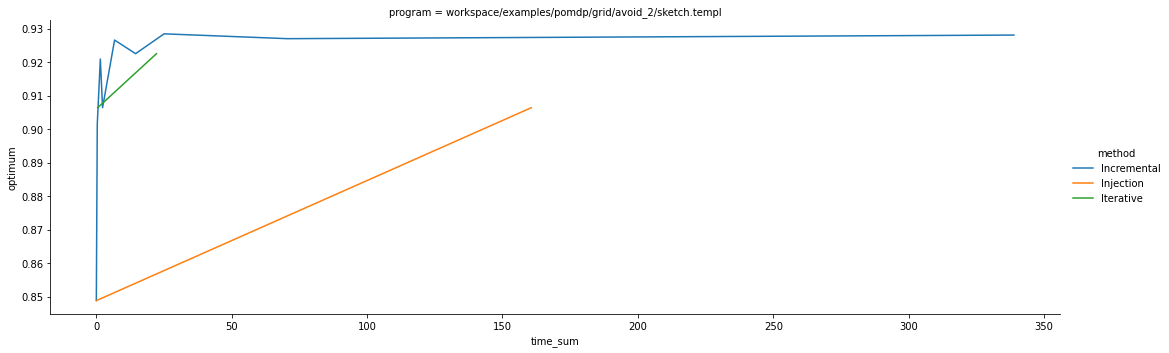

In [244]:
out = out.sort_values(["program", "method", "optimum"])
out["time_sum"] = out.groupby(["program", "method", "memory_size"]).time.transform(pd.Series.cumsum)

grouped = out.groupby([
     "program", "method", "optimum"
]).agg({ "time_sum": "max"}).reset_index()
# # 
grid = sns.relplot(
                data=grouped.where(grouped["program"].str.contains("_2")).dropna(),
                x="time_sum",
                y="optimum",
                col="program",
                kind="line",
                hue="method",
                legend="full",
                aspect=3,
                col_wrap=1,
                facet_kws={'sharey': False, 'sharex': False},
            )
grouped.where(grouped["program"].str.contains("_2")).dropna()